# Machine Learning Engineer Nanodegree

## Introduction and Foundations

## Project 0: Titanic Survival Exploration

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this introductory project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive. To complete this project, you will need to implement several conditional predictions and answer the questions below. Your project submission will be evaluated based on the completion of the code and your responses to the questions.
> **Tip:** Quoted sections like this will provide helpful instructions on how to navigate and use an iPython notebook. 

# Getting Started

To begin working with the RMS Titanic passenger data, we'll first need to `import` the functionality we need, and load our data into a `pandas` DataFrame.  
Run the code cell below to load our data and display the first few entries (passengers) for examination using the `.head()` function.
> **Tip:** You can run a code cell by clicking on the cell and using the keyboard shortcut **Shift + Enter** or **Shift + Return**. Alternatively, a code cell can be executed using the **Play** button in the hotbar after selecting it. Markdown cells (text cells like this one) can be edited by double-clicking, and saved using these same shortcuts. [Markdown](http://daringfireball.net/projects/markdown/syntax) allows you to write easy-to-read plain text that can be converted to HTML.

In [1]:
# third-party
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plot
import mpld3
import numpy
import pandas
import seaborn
from tabulate import tabulate
from fancyimpute import MICE

# RMS Titanic data visualization code 
from titanic_visualizations import survival_stats
from IPython.display import display


/home/cronos/.virtualenvs/machinelearning/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using Theano backend.


In [2]:
%matplotlib inline
FIGURE_WIDTH, FIGURE_HEIGHT = 10, 8
rcParams['figure.figsize'] = FIGURE_WIDTH, FIGURE_HEIGHT
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 18
seaborn.set_style('whitegrid')

mpld3.enable_notebook()

/home/cronos/.virtualenvs/machinelearning/local/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/home/cronos/.virtualenvs/machinelearning/local/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/home/cronos/.virtualenvs/machinelearning/local/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/home/cronos/.virtualenvs/machinelearning/local/lib/python2.7/site-package

In [3]:
# Load the dataset
in_file = 'titanic_data.csv'
full_data = pandas.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

/home/cronos/.virtualenvs/machinelearning/local/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/cronos/.virtualenvs/machinelearning/local/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code block cell to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [4]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
if 'Survived' in full_data.columns:
    outcomes = full_data['Survived']
    data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcome[i]`.

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how *accurate* our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct. Run the code cell below to create our `accuracy_score` function and test a prediction on the first five passengers.  

**Think:** *Out of the first five passengers, if we predict that all of them survived, what would you expect the accuracy of our predictions to be?*

In [5]:
print("Accuracy predicting first five passengers survive: {0:.2f}%").format(outcomes[:5].mean() * 100)

Accuracy predicting first five passengers survive: 60.00%


In [6]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pandas.Series(numpy.ones(5, dtype = int))
print accuracy_score(predictions, outcomes[:5])

Predictions have an accuracy of 60.00%.


> **Tip:** If you save an iPython Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the code blocks from your previous session to reestablish variables and functions before picking up where you last left off.


# Making Predictions

If we were told to make a prediction about any passenger aboard the RMS Titanic who we did not know anything about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers as a whole did not survive the ship sinking.  
The function below will always predict that a passenger did not survive.

In [7]:
def print_table_proportions(data, column, tablefmt='rst'):
    rates = data[column].value_counts(normalize=True)
    print(tabulate({column: rates.index,
                    'proportion': rates.values},
                   headers='keys',
                   tablefmt=tablefmt))
    return rates

In [8]:
full_data['lived_or_died'] = full_data.Survived.map({0: 'died', 1: 'lived'})
survival_rates = print_table_proportions(full_data, 'lived_or_died')


===============  ============
lived_or_died      proportion
===============  ============
died                 0.616162
lived                0.383838
===============  ============


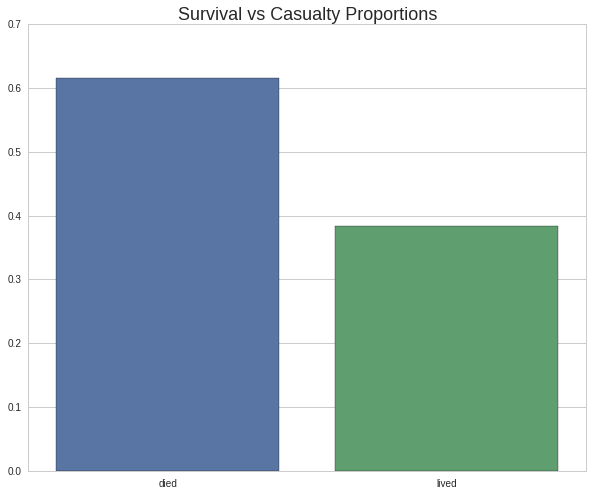

In [9]:
axe = seaborn.barplot(x=survival_rates.index, y=survival_rates.values)
title = axe.set_title("Survival vs Casualty Proportions")

In [10]:
def predict_all_die(data):
    """ Model with no features. Always predicts a passenger did not survive. """
    return pandas.Series(numpy.zeros(len(data['PassengerId'])))

# Make the predictions
predictions_all_died = predict_all_die(data)

### Question 1

*Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?*  
**Hint:** Run the code cell below to see the accuracy of this prediction.

In [11]:
print accuracy_score(outcomes, predictions_all_died)

Predictions have an accuracy of 61.62%.


**Answer:** Replace this text with the prediction accuracy you found above.

Let's take a look at whether the feature **Sex** has any indication of survival rates among passengers using the `survival_stats` function. This function is defined in the `titanic_visualizations.py` Python script included with this project. The first two parameters passed to the function are the RMS Titanic data and passenger survival outcomes, respectively. The third parameter indicates which feature we want to plot survival statistics across.  
Run the code cell below to plot the survival outcomes of passengers based on their sex.

In [12]:
females = full_data[full_data.Sex=='female']
males = full_data[full_data.Sex=='male']

In [13]:
sex_proportions = print_table_proportions(full_data, 'Sex')

============  ======
  proportion  Sex
============  ======
    0.647587  male
    0.352413  female
============  ======


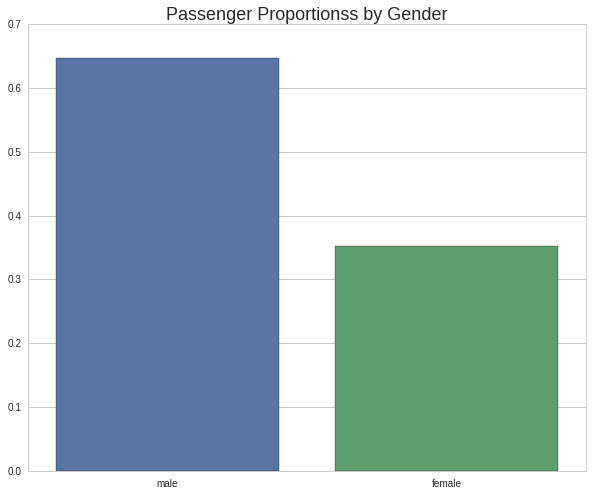

In [14]:
axe = seaborn.barplot(x=sex_proportions.index, y=sex_proportions.values)
title = axe.set_title("Passenger Proportionss by Gender")

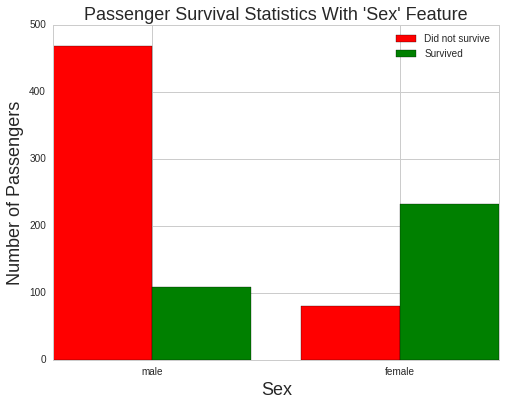

In [15]:
survival_stats(data, outcomes, 'Sex')

In [16]:
sex_lived_died = pandas.crosstab(full_data.Sex, full_data.lived_or_died)
female_count = sex_lived_died.ix['female'].sum()
male_count = sex_lived_died.ix['male'].sum()
assert female_count + male_count == full_data.Sex.count()
print(sex_lived_died)

lived_or_died  died  lived
Sex                       
female           81    233
male            468    109


In [17]:
sex_counts = pandas.DataFrame({'lived': [female_count, male_count],
                               'died': [female_count, male_count]},
                              index=['female', 'male'])
survival_by_sex_proportions = sex_lived_died/sex_counts
print(tabulate({'gender': survival_by_sex_proportions.index,
                "died": survival_by_sex_proportions.died,
                'lived': survival_by_sex_proportions.lived}, headers='keys', tablefmt='psql'))


+----------+----------+----------+
| gender   |    lived |     died |
|----------+----------+----------|
| female   | 0.742038 | 0.257962 |
| male     | 0.188908 | 0.811092 |
+----------+----------+----------+


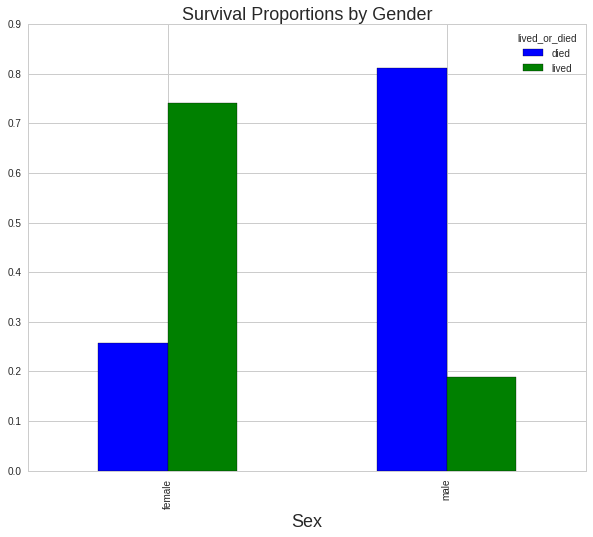

In [18]:
figure = plot.figure()
axe = figure.gca()
axe = survival_by_sex_proportions.plot.bar(title='Survival Proportions by Gender', ax=axe)

Examining the survival statistics, a large majority of males did not survive the ship sinking. However, a majority of females *did* survive the ship sinking. Let's build on our previous prediction: If a passenger was female, then we will predict that they survived. Otherwise, we will predict the passenger did not survive.  
Fill in the missing code below so that the function will make this prediction.  
**Hint:** You can access the values of each feature for a passenger like a dictionary. For example, `passenger['Sex']` is the sex of the passenger.

In [19]:
def predict_females_survive(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    sex_map = {'female': 1,
               'male': 0}
    predictions = data.Sex.map(sex_map)
    return predictions

# Make the predictions
predictions_females = predict_females_survive(data)

### Question 2

*How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?*  
**Hint:** Run the code cell below to see the accuracy of this prediction.

In [20]:
print accuracy_score(outcomes, predictions_females)

Predictions have an accuracy of 78.68%.


**Answer**: Replace this text with the prediction accuracy you found above.

Using just the **Sex** feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin. Now, let's consider using an additional feature to see if we can further improve our predictions. Consider, for example, all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? Let's start by looking at the **Age** of each male, by again using the `survival_stats` function. This time, we'll use a fourth parameter to filter out the data so that only passengers with the **Sex** 'male' will be included.  
Run the code cell below to plot the survival outcomes of male passengers based on their age.

ValueError: range parameter must be finite.

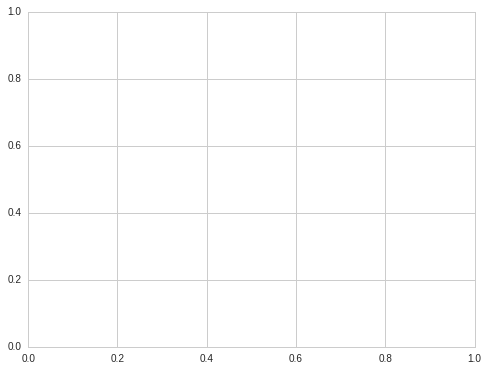

In [21]:
survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

Examining the survival statistics, the majority of males younger then 10 survived the ship sinking, whereas most males age 10 or older *did not survive* the ship sinking. Let's continue to build on our previous prediction: If a passenger was female, then we will predict they survive. If a passenger was male and younger than 10, then we will also predict they survive. Otherwise, we will predict they do not survive.  
Fill in the missing code below so that the function will make this prediction.  
**Hint:** You can start your implementation of this function using the prediction code you wrote earlier from `predictions_1`.

In [22]:
missing_ages = data[numpy.isnan(data.Age)]
print("There are {0} missing Age data entries.".format(len(missing_ages)))
missing_ages_male = missing_ages[missing_ages.Sex == 'male']
print('Of the missing, {0} are male.'.format(len(missing_ages_male)))

There are 177 missing Age data entries.
Of the missing, 124 are male.


First, pretend the data isn't missing.

In [23]:
males.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked',
       u'lived_or_died'],
      dtype='object')

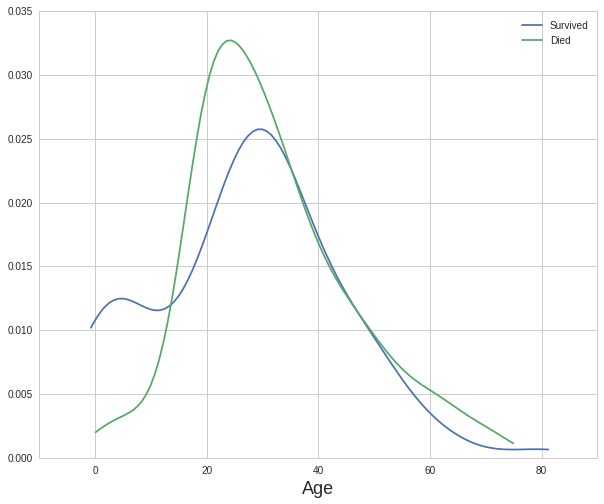

In [24]:
males_cleaned = males.dropna(subset=['Age'])
males_cleaned_survived = males_cleaned[males_cleaned.lived_or_died == 'lived']
males_cleaned_died = males_cleaned[males_cleaned.lived_or_died == 'died']
axe = seaborn.distplot(males_cleaned_survived.Age, hist=False, label="Survived")
axe = seaborn.distplot(males_cleaned_died.Age, hist=False, label='Died')

Looking at the KDEs, it looks like there are two points where the likelihood of surviving vs dying cross over. Sometime under 20 and around 80. There was only one passenger over 70 so that might not be significant.

In [25]:
lived_bins = pandas.cut(males_cleaned_survived.Age, 16)
lived_bins.value_counts(normalize=True).sort_index()

(0.34, 5.394]         0.161290
(5.394, 10.367]       0.043011
(10.367, 15.341]      0.021505
(15.341, 20.315]      0.086022
(20.315, 25.289]      0.086022
(25.289, 30.263]      0.161290
(30.263, 35.236]      0.161290
(35.236, 40.21]       0.086022
(40.21, 45.184]       0.064516
(45.184, 50.157]      0.064516
(50.157, 55.131]      0.021505
(55.131, 60.105]      0.021505
(60.105, 65.0787]     0.010753
(65.0787, 70.0525]    0.000000
(70.0525, 75.0263]    0.000000
(75.0263, 80]         0.010753
dtype: float64

In [26]:
died_bins = pandas.cut(males_cleaned_died.Age, 16)
died_bins.value_counts(normalize=True).sort_index()

(0.927, 5.562]       0.022222
(5.562, 10.125]      0.016667
(10.125, 14.688]     0.011111
(14.688, 19.25]      0.125000
(19.25, 23.812]      0.141667
(23.812, 28.375]     0.166667
(28.375, 32.938]     0.116667
(32.938, 37.5]       0.116667
(37.5, 42.0625]      0.080556
(42.0625, 46.625]    0.047222
(46.625, 51.188]     0.055556
(51.188, 55.75]      0.027778
(55.75, 60.312]      0.025000
(60.312, 64.875]     0.019444
(64.875, 69.438]     0.011111
(69.438, 74]         0.016667
dtype: float64

Looking at the two tables, all the ages below 15 have higher survival rates than death rates. The course suggests 10 as a cutoff so I'll try that first.

In [27]:

def predict_women_and_ten_year_olds(data, max_age=10):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than max_age. """
    def map_women_ten_year_olds(passenger):
        return 1 if passenger.Sex == 'female' or passenger.Age < max_age else 0

    return data.apply(map_women_ten_year_olds, axis=1)

# Make the predictions
predictions_women_ten_year_olds = predict_women_and_ten_year_olds(data)

### Question 3

*How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?*  
**Hint:** Run the code cell below to see the accuracy of this prediction.

In [28]:
print accuracy_score(outcomes, predictions_women_ten_year_olds)

Predictions have an accuracy of 79.35%.


In [29]:
predictions_women_15_year_olds = predict_women_and_ten_year_olds(data, max_age=15)
print accuracy_score(outcomes, predictions_women_15_year_olds)

Predictions have an accuracy of 79.01%.


No, ten seems to be a magic number.

Adding the feature **Age** as a condition in conjunction with **Sex** improves the accuracy by a small margin more than with simply using the feature **Sex** alone. Now it's your turn: Find a series of features and conditions to split the data on to obtain an outcome prediction accuracy of at least 80%. This may require multiple features and multiple levels of conditional statements to succeed. You can use the same feature multiple times with different conditions.   
**Pclass**, **Sex**, **Age**, **SibSp**, and **Parch** are some suggested features to try.

Use the `survival_stats` function below to to examine various survival statistics.  
**Hint:** To use mulitple filter conditions, put each condition in the list passed as the last argument. Example: `["Sex == 'male'", "Age < 18"]`

## Impute the data

What if the missing data is used?

In [31]:
male_ages_imputed = MICE().complete(males.Age.reshape(-1, 1))

[MICE] Completing matrix with shape (577, 1)
[MICE] Starting imputation round 1/110, elapsed time 0.000
[MICE] Starting imputation round 2/110, elapsed time 0.001
[MICE] Starting imputation round 3/110, elapsed time 0.001
[MICE] Starting imputation round 4/110, elapsed time 0.002
[MICE] Starting imputation round 5/110, elapsed time 0.002
[MICE] Starting imputation round 6/110, elapsed time 0.002
[MICE] Starting imputation round 7/110, elapsed time 0.002
[MICE] Starting imputation round 8/110, elapsed time 0.003
[MICE] Starting imputation round 9/110, elapsed time 0.003
[MICE] Starting imputation round 10/110, elapsed time 0.005
[MICE] Starting imputation round 11/110, elapsed time 0.005
[MICE] Starting imputation round 12/110, elapsed time 0.005
[MICE] Starting imputation round 13/110, elapsed time 0.005
[MICE] Starting imputation round 14/110, elapsed time 0.006
[MICE] Starting imputation round 15/110, elapsed time 0.006
[MICE] Starting imputation round 16/110, elapsed time 0.008
[MIC

In [ ]:
full_data.Pclass.unique()

In [ ]:
survival_stats(data, outcomes, 'Parch')

After exploring the survival statistics visualization, fill in the missing code below so that the function will make your prediction.  
Make sure to keep track of the various features and conditions you tried before arriving at your final prediction model.  
**Hint:** You can start your implementation of this function using the prediction code you wrote earlier from `predictions_2`.

In [ ]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        predictions.append(1 if passenger.Sex == 'female' or passenger.Age < 10 and passenger.Pclass > 1 and passenger.SibSp == 1 else 0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

### Question 4

*Describe the steps you took to implement the final prediction model so that it got an accuracy of at least 80%. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?*  
**Hint:** Run the code cell below to see the accuracy of your predictions.

In [ ]:
print accuracy_score(outcomes, predictions)

**Answer**: Replace this text with your answer to the question above.

# Conclusion

Congratulations on what you've accomplished here! You should now have an algorithm for predicting whether or not a person survived the Titanic disaster, based on their features. In fact, what you have done here is a manual implementation of a simple machine learning model, the _decision tree_. In a decision tree, we split the data into smaller groups, one feature at a time. Each of these splits will result in groups that are more homogeneous than the original group, so that our predictions become more accurate. The advantage of having a computer do things for us is that it will be more exhaustive and more precise than our manual exploration above. [This link](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) provides another introduction into machine learning using a decision tree.

A decision tree is just one of many algorithms that fall into the category of _supervised learning_. In this Nanodegree, you'll learn about supervised learning techniques first. In supervised learning, we concern ourselves with using features of data to predict or model things with objective outcome labels. That is, each of our datapoints has a true outcome value, whether that be a category label like survival in the Titanic dataset, or a continuous value like predicting the price of a house.

### Question 5
*Can you think of an example of where supervised learning can be applied?*  
**Hint:** Be sure to note the outcome variable to be predicted and at least two features that might be useful for making the predictions.

**Answer**: Replace this text with your answer to the question above.

> **Tip:** If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the iPython Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or  
PDF (.pdf). You may need additional packages or software to perform these exports.